## NPC Real Estate EDA
### By Victory Okechukwu

### Introduction

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Loading the dataset
df = pd.read_csv('Real_estate_clean.csv')

In [3]:
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


### Preliminary cleaning

In [4]:
df = df.drop(index=4163).reset_index(drop=True)
df = df.drop(index=df[df['Price'] > 4e+9].index).reset_index(drop=True)
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [5]:
locations = df['Location'].value_counts().to_frame()[df['Location']
            .value_counts().to_frame()['Location'] > 10].index.values.tolist()
df = df[df['Location'].isin(locations)]
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


### Univariate Exploration

In [6]:
df['Price'].describe()

count    4.765000e+03
mean     2.574137e+08
std      3.893241e+08
min      6.000000e+06
25%      7.000000e+07
50%      1.200000e+08
75%      2.500000e+08
max      4.000000e+09
Name: Price, dtype: float64

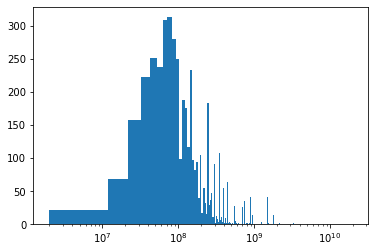

In [7]:
bins = np.arange(1.95e+6,2e+10,1e+7)
plt.hist(data=df, x='Price',bins=bins)
plt.xscale('log');

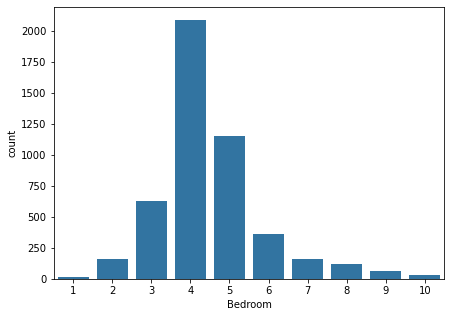

In [8]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[7,5])
sb.countplot(data=df, x='Bedroom',color=base_color);

In [9]:
def ploty(x):
    df[x].value_counts().head(15).plot(kind='barh')
    plt.title('Count of {}'.format(x))
    plt.xlabel('Count')
    plt.ylabel(x)
    plt.gca().invert_yaxis()

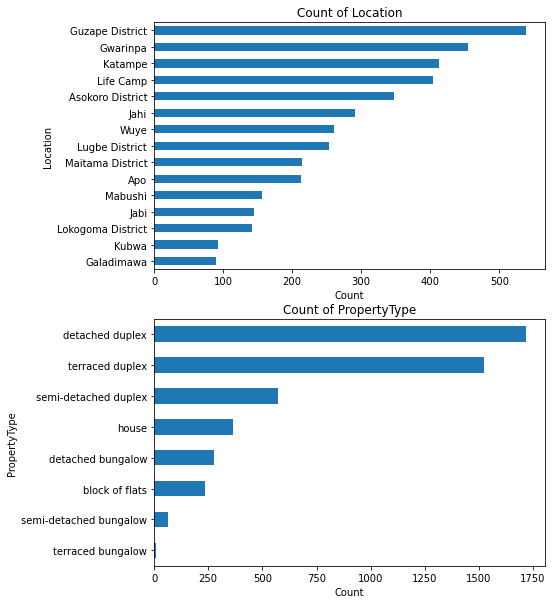

In [10]:
plt.figure(figsize=[7,10])
plt.subplot(2,1,1)
ploty(x='Location')
plt.subplot(2,1,2)
ploty(x='PropertyType')

### Bivariate Exploration

In [30]:
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


### Multivariate Exploration